In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Random walks

- Implement a 1D discrete Random Walk.
- What is the probability that the walk returns to the origin.
- What is the mean number of steps to return. 
- What is the returning steps distribution.
- What input parameter can influence the output.
- Explore the relation input-output.

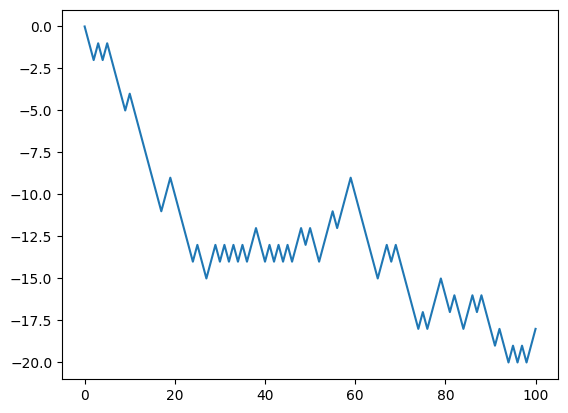

In [ ]:
start = 0  # This is the origin

walk = [0]

steps = 100

def make_1d_walk(steps=100, start=0, p=0.5):
    returned = False
    walk = [start]
    for step in range(steps):
        walk += [walk[-1] + 2*(int(np.random.random()*2))-1]
        if walk[-1] == start: returned = True; break  # Returned origin
    return walk, returned

plt.plot(make_1d_walk(100)[0])

In [ ]:
simulations = 10000
sum([make_1d_walk(steps=10000)[1] for si in range(simulations)])/simulations

0.98

In [ ]:
simulations = 10000
result = []
for si in range(simulations):
    walk = make_1d_walk(steps=10000)
    result += [(len(walk[0])-1, walk[1])]
data_results = pd.DataFrame(data=np.array(result), columns=['steps', 'returned'])
data_results.head()

,steps,returned
0,2,1
1,4,1
2,4,1
3,2,1
4,2,1


In [ ]:
data_returned = data_results.query("returned == 1")
data_returned.steps.mean()

76.43777083543283

In [ ]:
data_returned.steps.min(), data_returned.steps.max()

(2, 9510)

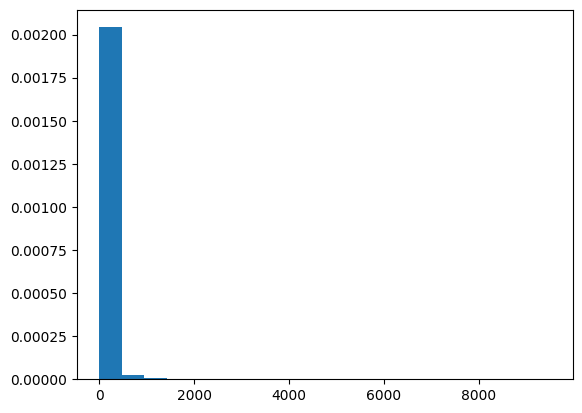

In [ ]:
x, f = np.unique(data_returned.steps, return_counts=True)
plt.hist(data_returned.steps, density=True, bins=20);

<BarContainer object of 10 artists>

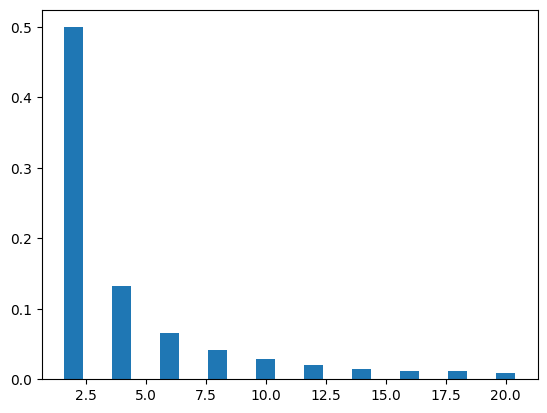

In [ ]:
plt.bar(x[:10], f[:10]/f.sum())

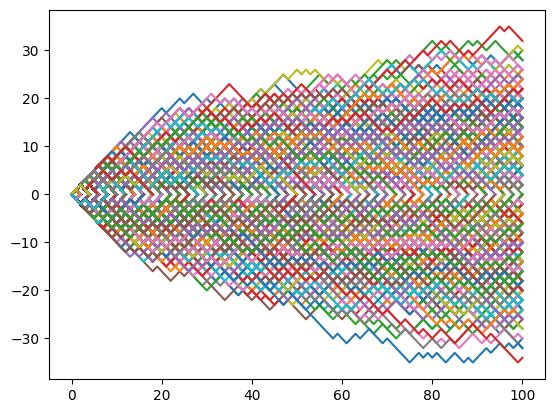

In [ ]:
for i in range(10000):
    plt.plot(make_1d_walk()[0])


In [ ]:
simulations = 100000
cumples = np.random.randint(365, size=(simulations, 19))
result = np.array([len(np.unique(ci)) for ci in cumples])
len(np.where(result < 19)[0]) / simulations

0.37852

### Post - session

- Check:
  - https://anaconda.org/marsgr6/randomness/notebook

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>